In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
load = pd.read_csv('../Data/load.csv')
prices = pd.read_csv('../Data/prices.csv')
res_gen = pd.read_csv('../Data/res_gen.csv')
residual_generation = pd.read_csv('../Data/residual_generation.csv')
industrial_demand = pd.read_csv('../Data/industrial_demand.csv')

#merge them all on date
data = pd.merge(load, prices, on='date')
data = pd.merge(data, res_gen, on='date')
data = pd.merge(data, residual_generation, on='date')
data = pd.merge(data, industrial_demand, on='date')

#drop price_FRA
data = data.drop(columns=['price_FRA'])

data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['weekday'] = data['date'].dt.weekday

#replace n/e with np.NaN
data = data.replace('n/e', np.NaN)
data.isna().sum()

#save to csv
data.to_csv('data.csv', index=False)

# Descriptive analysis

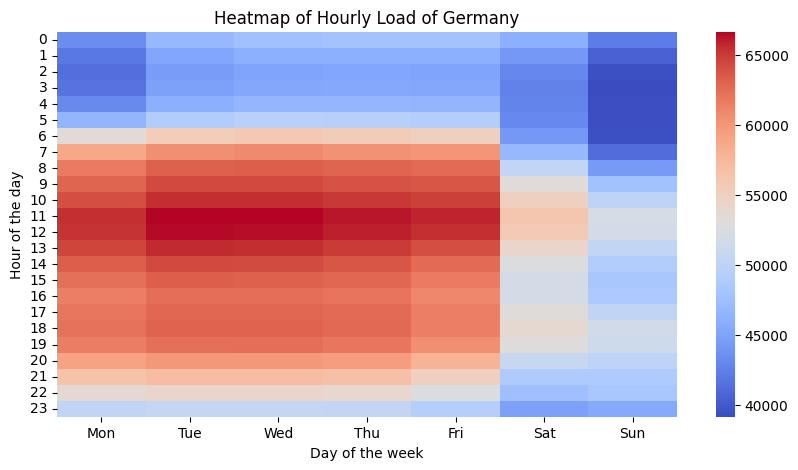

In [17]:
load_pivot = data.pivot_table(index='hour', columns='weekday', values='load_GER', aggfunc='mean')

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(load_pivot, cmap='coolwarm', ax=ax)

ax.set_title('Heatmap of Hourly Load of Germany')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Hour of the day')
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

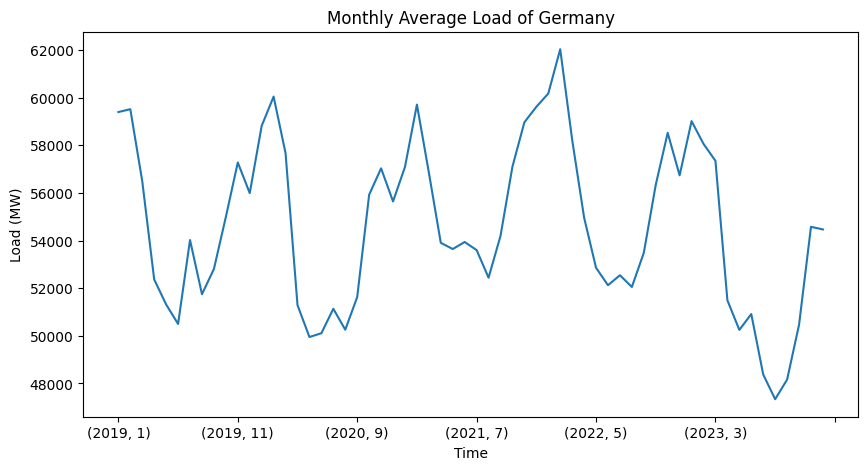

In [28]:
#group data to a yearly and monthly level
yearly_monthly_data = data.groupby(['year', 'month']).mean()

#plot the monthly average load
fig, ax = plt.subplots(figsize=(10, 5))
yearly_monthly_data['load_GER'].plot(ax=ax)
ax.set_title('Monthly Average Load of Germany')
ax.set_xlabel('Time')
ax.set_ylabel('Load (MW)')
plt.show()

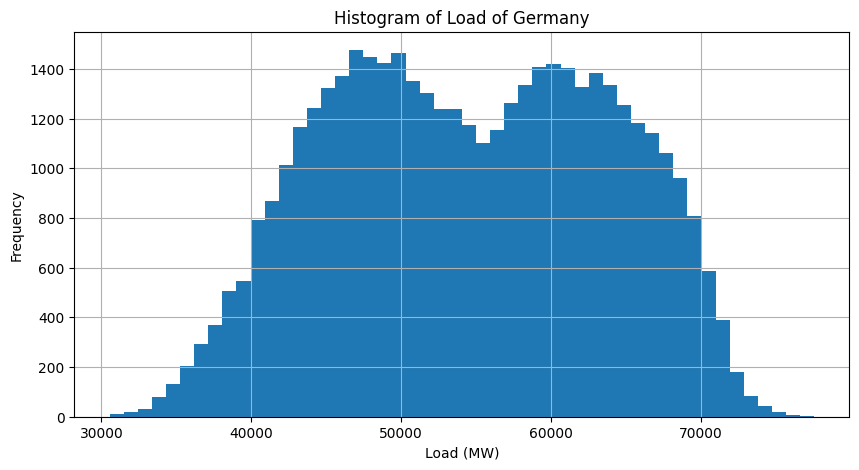

In [27]:
#make histogram of the load
fig, ax = plt.subplots(figsize=(10, 5))
data['load_GER'].hist(ax=ax, bins=50)
ax.set_title('Histogram of Load of Germany')
ax.set_xlabel('Load (MW)')
ax.set_ylabel('Frequency')
plt.show()

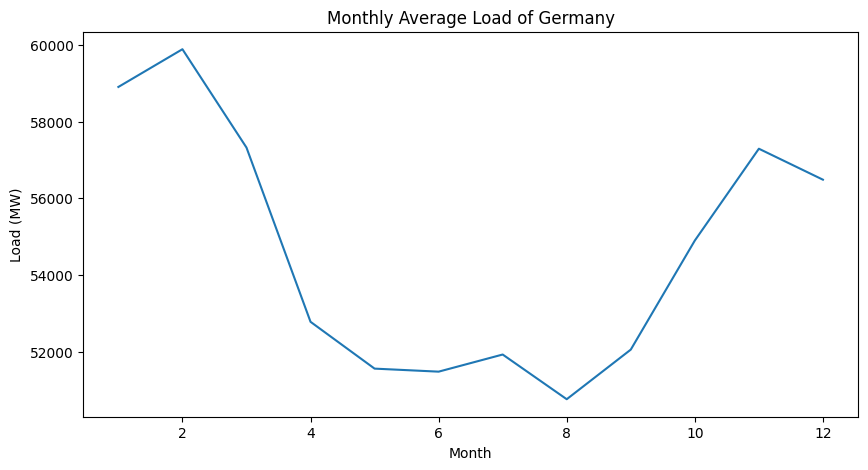

In [30]:
#group data to monthly level
monthly_data = data.groupby(['month']).mean()

#plot the monthly average load
fig, ax = plt.subplots(figsize=(10, 5))
monthly_data['load_GER'].plot(ax=ax)
ax.set_title('Monthly Average Load of Germany')
ax.set_xlabel('Month')
ax.set_ylabel('Load (MW)')
plt.show()

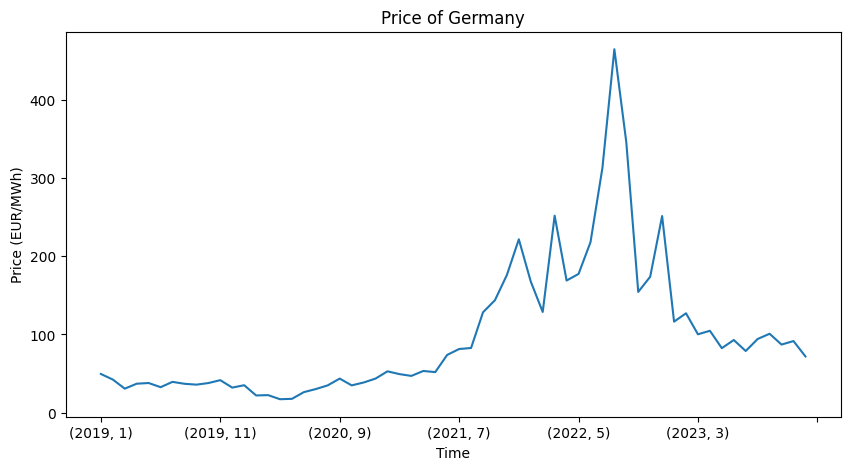

In [32]:
# plot prices
fig, ax = plt.subplots(figsize=(10, 5))
yearly_monthly_data['price_GER'].plot(ax=ax)
ax.set_title('Price of Germany')
ax.set_xlabel('Time')
ax.set_ylabel('Price (EUR/MWh)')
plt.show()

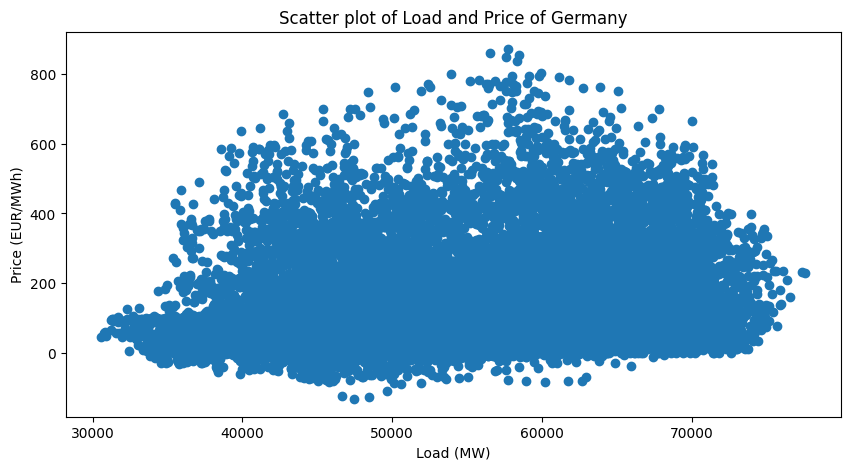

In [33]:
#scatter plot for load and price
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(data['load_GER'], data['price_GER'])
ax.set_title('Scatter plot of Load and Price of Germany')
ax.set_xlabel('Load (MW)')
ax.set_ylabel('Price (EUR/MWh)')
plt.show()